# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df=pd.read_csv("PoliceKillingsUS.csv",encoding="windows-1252")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1: Plot number of people by gender

In [3]:
df.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

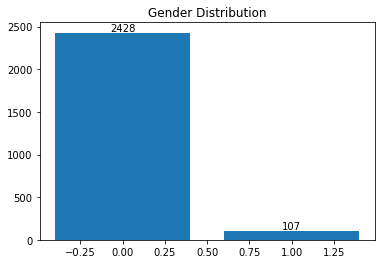

In [5]:
fig, ax = plt.subplots()
x =[0,1]
y = df.gender.value_counts().values
ax.bar(x,y )
ax.set_title("Gender Distribution")
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha="center",va="bottom")

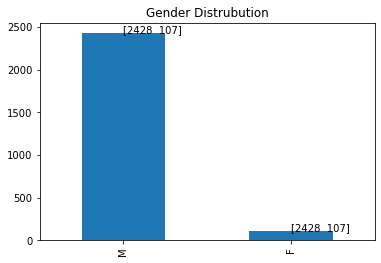

In [17]:
fig,ax=plt.subplots()

y=df.gender.value_counts().values
x=df.gender.value_counts().index

df.gender.value_counts().plot.bar(ax=ax)
ax.set_title("Gender Distrubution")
for index,value in enumerate(y):
        plt.text(index,value,str(y))

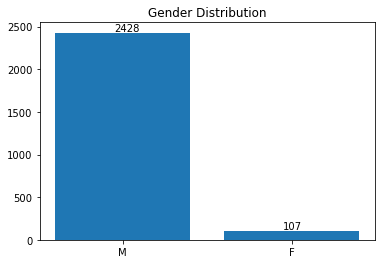

In [18]:
fig, ax = plt.subplots()
x = df.gender.value_counts().index
y = df.gender.value_counts().values
ax.bar(x,y )
ax.set_title("Gender Distribution")


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+20));

In [9]:
ax.patches

In [12]:
ax.patches[0].get_height()  # arsayı verir

2428

In [ ]:
df.gender.value_counts().plot()

In [ ]:
df.gender.value_counts().plot(kind="bar")

In [ ]:
# with pandas
df.groupby("gender")["gender"].count().plot.bar()

Text(0, 0.5, 'Number')

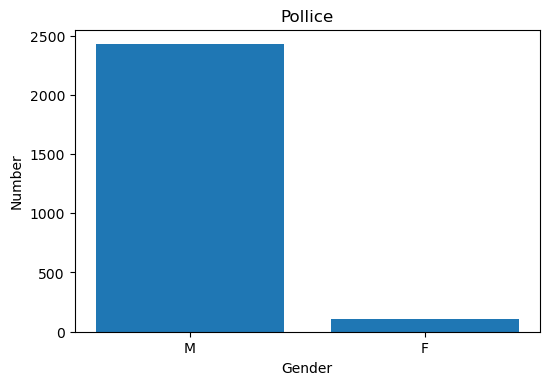

In [19]:
# with matplotlib
plt.figure(figsize=(6,4),dpi=100)
y=df.gender.value_counts().values
x=df.gender.value_counts().index
plt.bar(x,y)
plt.title("Pollice")
#plt.text("index","value",str(value))
plt.xlabel("Gender")
plt.ylabel("Number")

## 2: Plot 7 most common kill weapons

In [ ]:
df.head()

In [26]:
arm=df.armed.value_counts().head(7)

In [27]:
arm=df.armed.value_counts()[:7]

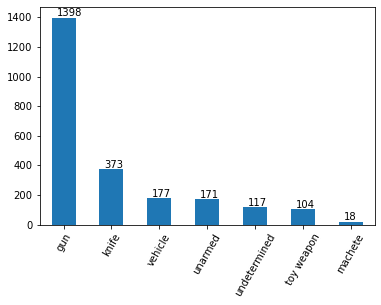

In [37]:
fig,ax=plt.subplots()
arm.plot(kind="bar")
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

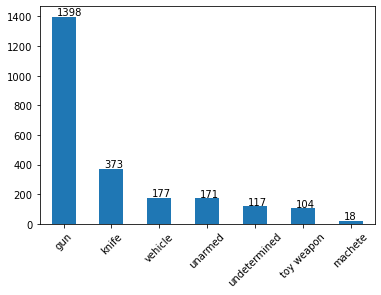

In [38]:
# with pandas
fig, ax = plt.subplots()
arm.plot(kind="bar", ax = ax)
ax.set_xticklabels(arm.index, rotation = 45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

In [39]:
y=df.armed.value_counts()[:7].values
x=df.armed.value_counts()[:7].index

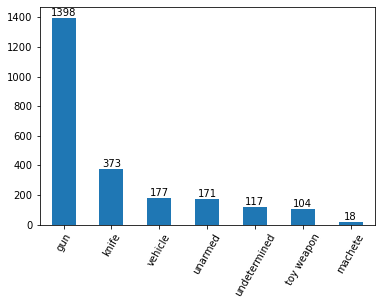

In [44]:
df.armed.value_counts()[:7].plot.bar()
plt.xticks(rotation=60)

for index,value in enumerate(y):
    plt.text(index,value, str(value),ha="center",va="bottom")
    

In [ ]:
# with pandas


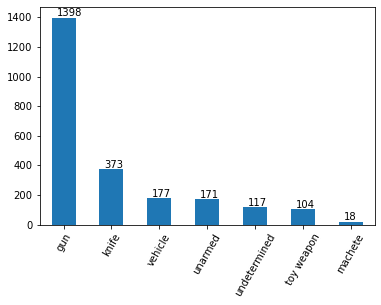

In [41]:
fig,ax=plt.subplots()
x=arm.index
y=arm.values
arm.plot(kind="bar")
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

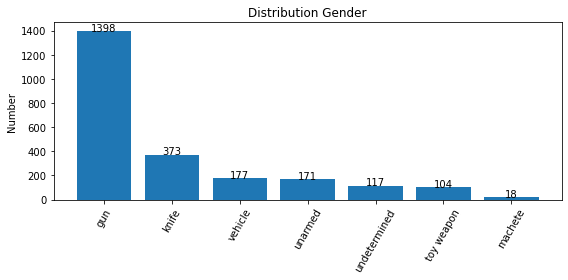

In [42]:
# with matplotlib
fig,ax=plt.subplots(figsize=(8,4))
ax.set_ylabel("Number")
ax.set_title("Distribution Gender")
ax.bar(x,y)
plt.xticks(rotation=60)
fig.tight_layout()
for index,value in enumerate(y):
    plt.text(index,value,str(value),ha="center")

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [45]:
df.age

0       53.0
1       47.0
2       23.0
3       32.0
4       39.0
        ... 
2530    31.0
2531     NaN
2532    48.0
2533    28.0
2534    32.0
Name: age, Length: 2535, dtype: float64

In [46]:
df['age_cat']=df['age'].apply(lambda x: 'above25' if x>25 else 'below25')

In [47]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [68]:
under=df[df["age"]<=25]["age"].count()
under

553

In [67]:
upper=df[df["age"]>25]["age"].count()
upper

1905

In [69]:
x=[under[0],upper[0]]
y=["under","upper"]
fig,ax=plt.sublpots()
ax.bar(y,x)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

IndexError: invalid index to scalar variable.

In [60]:
under=df[df["age"]>25]["age"].count
under

<bound method Series.count of 0       53.0
1       47.0
3       32.0
4       39.0
7       35.0
        ... 
2529    32.0
2530    31.0
2532    48.0
2533    28.0
2534    32.0
Name: age, Length: 1905, dtype: float64>

In [ ]:
x = [under[0],upper[0]]
y=["under ", "upper"]
fig , ax = plt.subplots()
ax.bar(y,x)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

In [ ]:
age=pd.DataFrame()

In [ ]:
old=(df.age<=25)

In [ ]:
old.isnull().sum()

In [ ]:
old.dropna().isnull().sum()

In [ ]:
old=age.dropna()

In [ ]:
(old<=25).value_counts().plot.bar()

In [ ]:
j=df.age<=25
k=df.age>25
df["ebove25"]= k

In [ ]:
df.ebove25.value_counts()

In [ ]:
plt.bar(["25 yaş altı","25 yaş üstü"],[a,b]);
for index,value in enumerate([a,b]):
    plt.text(index,value,str(value),ha="center")

In [ ]:
# with pandas


In [ ]:
plt.

In [ ]:
# with matplotlib

## 4: Plot number of killed poeple by race

In [ ]:
# with pandas


In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [71]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [73]:
df.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

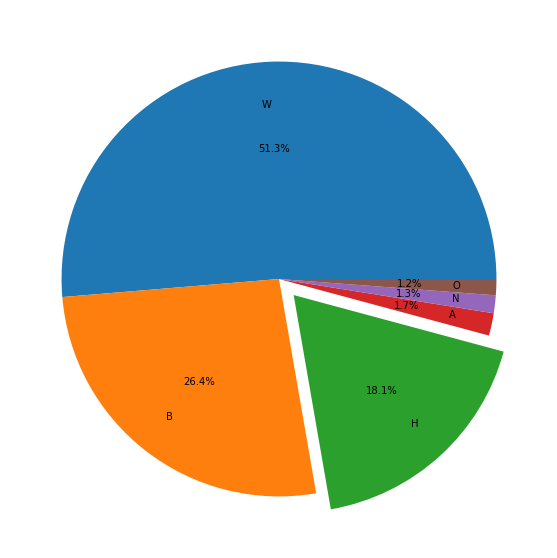

In [88]:
fig,ax=plt.subplots(figsize=(10,10))
x=df.race.value_counts().values
label=df.race.value_counts().index
ax.pie(x,labels=label,labeldistance=0.8,
      autopct="%.1f%%",
      explode=[0,0,0.1,0,0,0,]);

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [ ]:
# matplotlib



## 6: Most common 15 Name or Surname of killed people 

In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


In [ ]:
type(pairs)

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

In [ ]:
# with pandas


In [ ]:
# with matplotlib
